# Telco Churn Feature Engineering & ML

In this project, I will develop a machine learning model that can predict churn customers in a telco company. I will perform the necessary data analysis and feature engineering steps before developing the model.

#### Dataset Story:

Telco churn data includes information about a fictitious telecom company that provided home phone and Internet services to 7,043 California customers in the third quarter. It shows which customers have left, stayed or signed up for their service.

**CustomerId:** Customer ID<br>
**Gender:** Gender<br>
**SeniorCitizen:** Whether the client is older (1, 0)<br>
**Partner:** Whether the client has a partner (Yes, No)<br>
**Dependents:** Whether the client has dependents (Yes, No)<br>
**tenure:** The number of months the customer has stayed with the company<br>
**PhoneService:** Whether the customer has phone service (Yes, No)<br>
**MultipleLines:** Whether the customer has more than one line (Yes, No, No Telephone service)<br>
**InternetService:** Customer's internet service provider (DSL, Fiber optic, No)<br>
**OnlineSecurity:** Whether the customer has online security (Yes, No, no Internet service)<br>
**OnlineBackup:** Whether the customer has an online backup (Yes, No, no Internet service)<br>
**DeviceProtection:** Whether the customer has device protection (Yes, No, no Internet service)<br>
**TechSupport:** Whether the customer has technical support (Yes, No, no Internet service)<br>
**StreamingTV:** Whether the customer has TV streaming (Yes, No, no Internet service)<br>
**StreamingMovies:** Whether the customer is streaming movies (Yes, No, no Internet service)<br>
**Contract:** Customer's contract duration (Month to month, One year, Two years)<br>
**PaperlessBilling:** Whether the customer has a paperless invoice (Yes, No)<br>
**PaymentMethod:** Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))<br>
**MonthlyCharges:** The amount charged to the customer monthly<br>
**TotalCharges:** The total amount charged from the customer<br>
**Churn:** Whether the customer uses it (Yes or No)

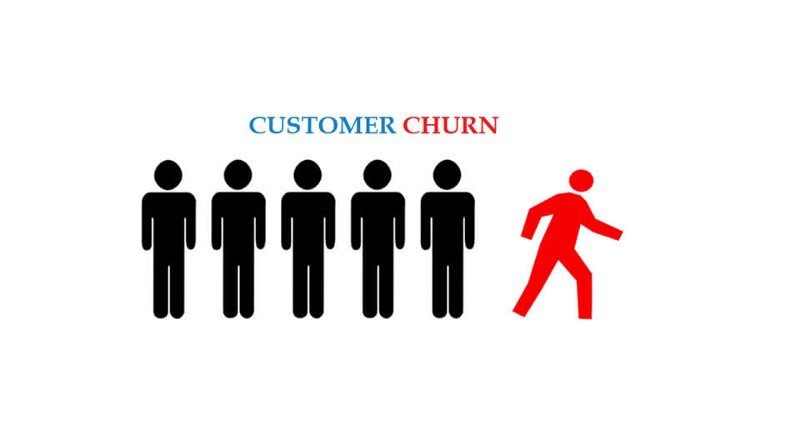

## 1. Importing the Libraries and Uploading Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.expand_frame_repr', False)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_ = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df = df_.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


## 2. General Information About Dataset

In [4]:
def gen_info(df, box=True, column="tenure"):
    print(30*"#" + "Shape".center(30) + 30*"#")
    print(df.shape)
    print("\n"+ 30*"#" + "Types".center(30) + 30*"#")
    print(df.dtypes)
    print("\n"+ 30*"#" + "Missing Values".center(30) + 30*"#")
    print(df.isnull().sum())
    print("\n"+ 30*"#" + "Quantiles".center(30) + 30*"#")
    print(df.describe([0.01, 0.05, 0.50, 0.95, 0.99]).T)
    print("\n"+ 30*"#" + "BOX PLOT".center(30) + 30*"#")
    if box == True:
        sns.boxplot(x=df[column])
        print(plt.show())

##############################            Shape             ##############################
(7043, 21)

##############################            Types             ##############################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##############################        Missing Values        ##############################
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
te

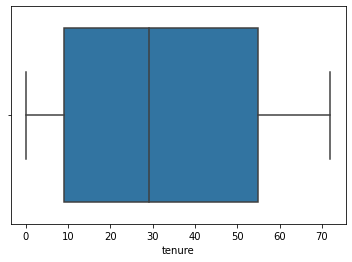

None


In [5]:
gen_info(df)

## 3. Discovery Data Analysis

Starting with capturing numeric and categorical variables

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
        dataframe: dataframe
                The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                threshold value for numeric but categorical variables
        car_th: int, optinal
                threshold value for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                Categorical but cardinal variable list

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 returned lists equals the total number of variables: 
        cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [7]:
cat_cols, num_cols, cat_but_car = grab_col_names(df) 

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


In [8]:
print(f'cat_cols: {cat_cols}\n')
print(f'num_cols: {num_cols}\n')
print(f'cat_but_car: {cat_but_car}\n')

cat_cols: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']

num_cols: ['tenure', 'MonthlyCharges']

cat_but_car: ['customerID', 'TotalCharges']



TotalCharges column is str, I want to analyze this column more

In [9]:
(pd.to_numeric(df['TotalCharges'],errors='coerce') >= 0).value_counts()

True     7032
False      11
Name: TotalCharges, dtype: int64

In [10]:
df[df["TotalCharges"] == " "] # 11 values are empty because they are new customers and they have not paid yet.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.550,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.850,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.050,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350,,No


In [11]:
df.loc[df["TotalCharges"] == " ", "TotalCharges"] = np.nan 

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce') # making TotalCharcges numeric

In [13]:
df[df['TotalCharges'].isnull()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.550,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.850,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.050,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350,NaN,No


Let's check if there are anomalies in other columns.

In [14]:
for i in cat_cols:
    print(df[i].value_counts(dropna = False))

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

In [15]:
for i in df.columns:
    print(i, pd.isna(df[i]).any())

customerID False
gender False
SeniorCitizen False
Partner False
Dependents False
tenure False
PhoneService False
MultipleLines False
InternetService False
OnlineSecurity False
OnlineBackup False
DeviceProtection False
TechSupport False
StreamingTV False
StreamingMovies False
Contract False
PaperlessBilling False
PaymentMethod False
MonthlyCharges False
TotalCharges True
Churn False


We don't have more NaN values in our dataframe

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.dropna(inplace=True) # dropping the 11 NaN rows

In [18]:
df[df['TotalCharges'].isnull()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## 4. Analyzing the numerical and categorical variables.

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
tenure,7032.000,32.422,24.545,1.000,9.000,29.000,55.000,72.000
MonthlyCharges,7032.000,64.798,30.086,18.250,35.587,70.350,89.862,118.750
TotalCharges,7032.000,2283.300,2266.771,18.800,401.450,1397.475,3794.738,8684.800


Male      3549
Female    3483
Name: gender, dtype: int64


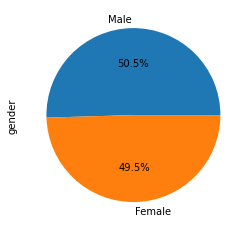

No     3639
Yes    3393
Name: Partner, dtype: int64


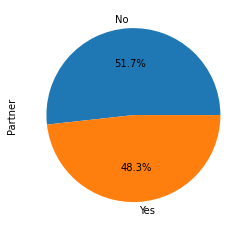

No     4933
Yes    2099
Name: Dependents, dtype: int64


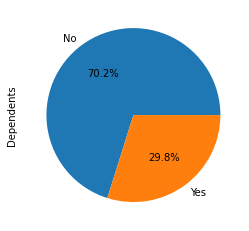

Yes    6352
No      680
Name: PhoneService, dtype: int64


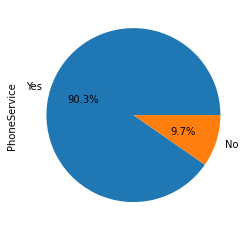

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


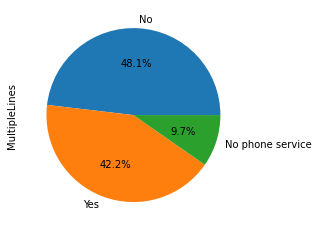

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


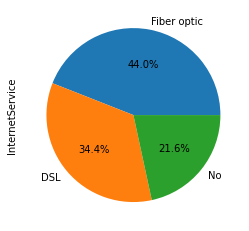

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


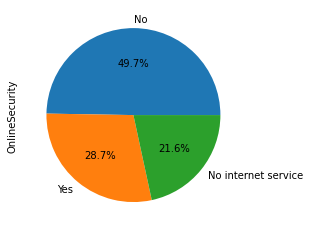

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


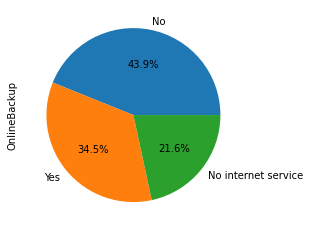

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


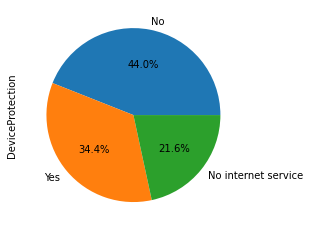

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


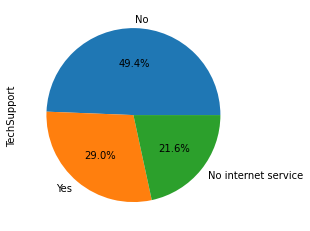

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


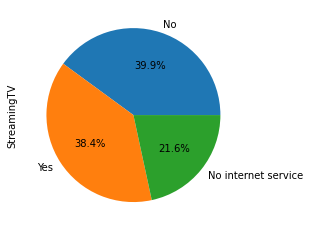

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64


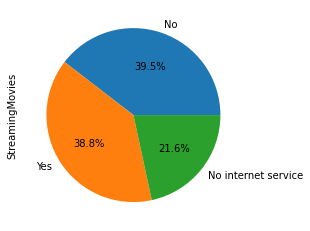

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


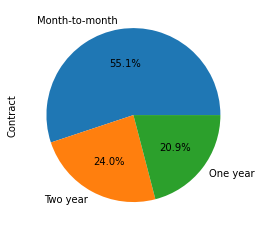

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


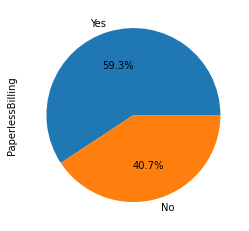

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


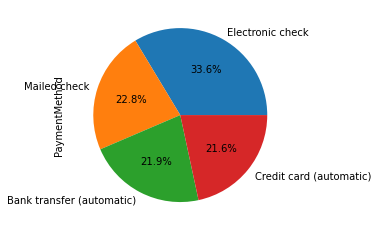

No     5163
Yes    1869
Name: Churn, dtype: int64


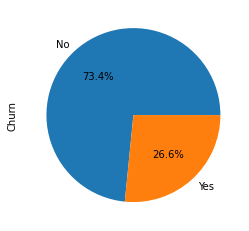

0    5890
1    1142
Name: SeniorCitizen, dtype: int64


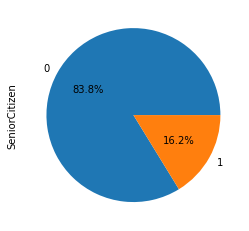

In [20]:
for i in cat_cols:
    print(df[i].value_counts())
    df[i].value_counts().plot(kind='pie',y='points',autopct='%1.1f%%')
    plt.show();

       tenure
Churn        
No     37.650
Yes    17.979



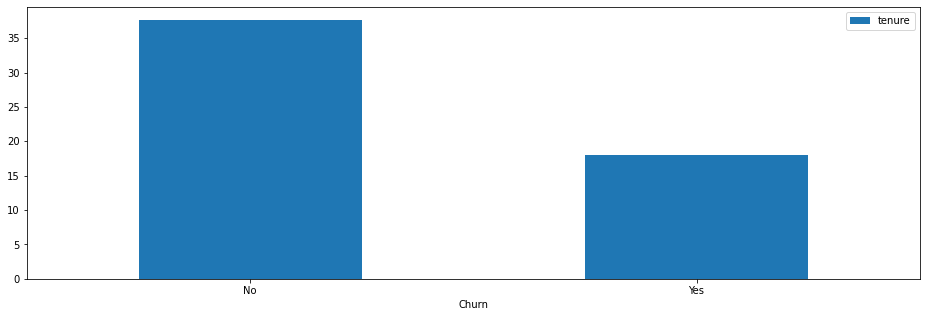

       MonthlyCharges
Churn                
No             61.307
Yes            74.441



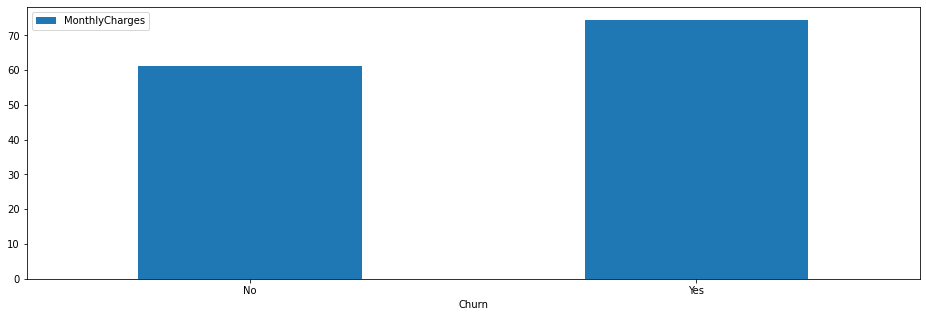

In [21]:
for i in num_cols:
    print(df.groupby('Churn').agg({i:'mean'}),end='\n\n') 
    df.groupby('Churn').agg({i:'mean'}).plot(kind='bar', rot = 0,figsize=(16,5))
    plt.show()

## 5. Outlier Analysis

First, I will define functions for finding outliers.,

In [22]:
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [23]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [24]:
cat_cols, num_cols, cat_but_car = grab_col_names(df) # let's use againg, becase we change TotalCharges type

Observations: 7032
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [25]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [26]:
for i in num_cols:
    print(i, check_outlier(df, i)) 

tenure False
MonthlyCharges False
TotalCharges False


We have no outliers then, good :)

##### Checking correlation:

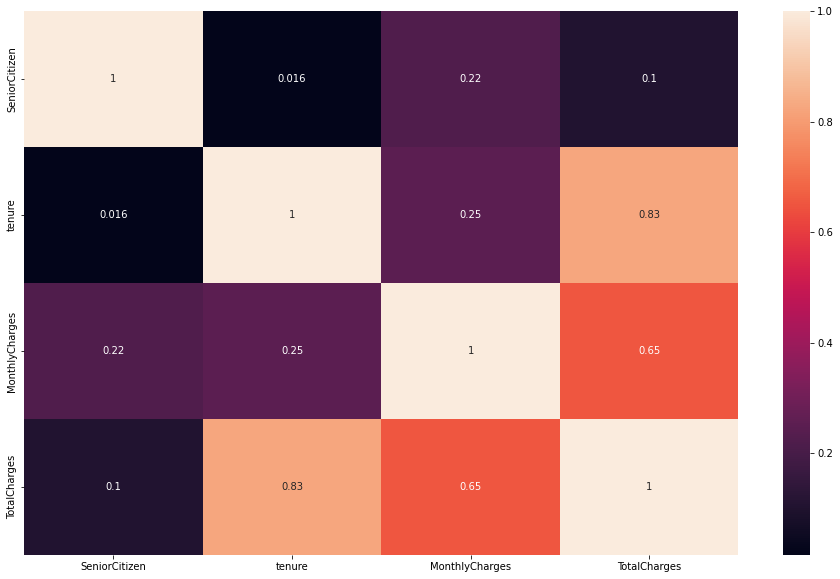

In [27]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True);

## 6. Feature Engineering

First, I want to apply label encoding for the churn column

In [28]:
lbe=LabelEncoder()

In [29]:
df['Churn']=lbe.fit_transform(df['Churn'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


In [30]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
tenure,7032.000,32.422,24.545,1.000,9.000,29.000,55.000,72.000
MonthlyCharges,7032.000,64.798,30.086,18.250,35.587,70.350,89.862,118.750
TotalCharges,7032.000,2283.300,2266.771,18.800,401.450,1397.475,3794.738,8684.800
Churn,7032.000,0.266,0.442,0.000,0.000,0.000,1.000,1.000


##### Categorical_tenure:

In [32]:
df['Categorical_tenure']=pd.qcut(df['tenure'],4,labels=['tenure_Q1','tenure_Q2','tenure_Q3','tenure_Q4'])

                    Churn
Categorical_tenure       
tenure_Q1           0.501
tenure_Q2           0.283
tenure_Q3           0.188
tenure_Q4           0.077



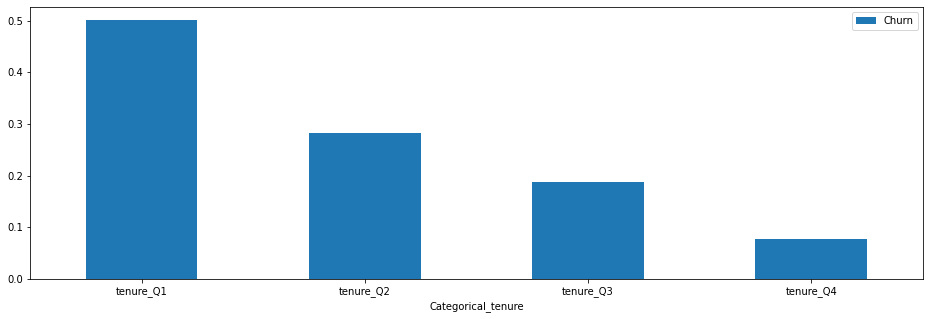

In [33]:
print(df.groupby('Categorical_tenure').agg({'Churn':'mean'}),end='\n\n') 
df.groupby('Categorical_tenure').agg({'Churn':'mean'}).plot(kind='bar', rot = 0,figsize=(16,5))
plt.show()

The visual pretty much explains the situation. In this dataframe, we observe that we lose customers mostly in the first months.

##### Categorical_MonthlyCharges:

In [34]:
df['Categorical_MonthlyCharges']=pd.qcut(df['MonthlyCharges'],4,labels=
                                         ['MonthlyCharges_Q1','MonthlyCharges_Q2'
                                          ,'MonthlyCharges_Q3','MonthlyCharges_Q4'])

                            Churn
Categorical_MonthlyCharges       
MonthlyCharges_Q1           0.113
MonthlyCharges_Q2           0.246
MonthlyCharges_Q3           0.375
MonthlyCharges_Q4           0.329



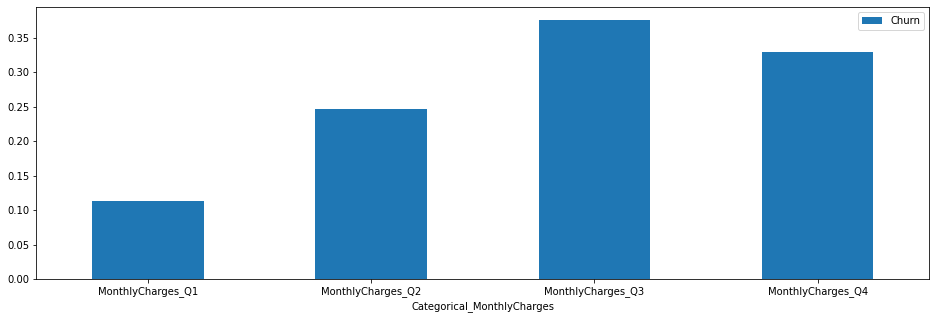

In [35]:
print(df.groupby('Categorical_MonthlyCharges').agg({'Churn':'mean'}),end='\n\n') 
df.groupby('Categorical_MonthlyCharges').agg({'Churn':'mean'}).plot(kind='bar', rot = 0,figsize=(16,5))
plt.show()

The company is mostly losing customers with high monthly payments.

##### Categorical_TotalCharges:

In [36]:
df['Categorical_TotalCharges']=pd.qcut(df['TotalCharges'],4,labels=
                                         ['TotalCharges_Q1','TotalCharges_Q2'
                                          ,'TotalCharges_Q3','TotalCharges_Q4'])

                          Churn
Categorical_TotalCharges       
TotalCharges_Q1           0.435
TotalCharges_Q2           0.253
TotalCharges_Q3           0.230
TotalCharges_Q4           0.145



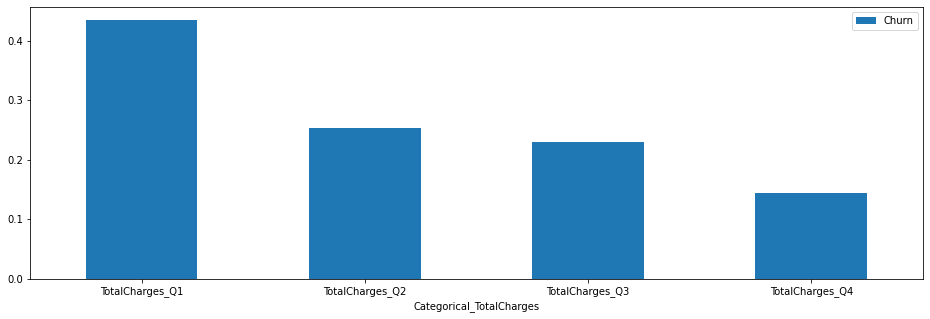

In [37]:
print(df.groupby('Categorical_TotalCharges').agg({'Churn':'mean'}),end='\n\n') 
df.groupby('Categorical_TotalCharges').agg({'Churn':'mean'}).plot(kind='bar', rot = 0,figsize=(16,5))
plt.show()

In [38]:
df.groupby('Categorical_TotalCharges').agg({'MonthlyCharges':'mean'})

,MonthlyCharges
Categorical_TotalCharges,
TotalCharges_Q1,46.496
TotalCharges_Q2,50.266
TotalCharges_Q3,68.868
TotalCharges_Q4,93.562


In [39]:
df.groupby('Categorical_TotalCharges').agg({'tenure':'mean'}) # this 2 column was high corr

,tenure
Categorical_TotalCharges,
TotalCharges_Q1,4.375
TotalCharges_Q2,24.644
TotalCharges_Q3,39.373
TotalCharges_Q4,61.295


In [40]:
df["customerID"].head()

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: customerID, dtype: object

In [41]:
df["NEW1_customerID"] = df["customerID"].apply(lambda x: [x for x in x.split("-")][0])
df["NEW1_customerID"].head()

0    7590
1    5575
2    3668
3    7795
4    9237
Name: NEW1_customerID, dtype: object

In [42]:
df["NEW2_customerID"] = df["customerID"].apply(lambda x: [x for x in x.split("-")][1])
df["NEW2_customerID"].head()

0    VHVEG
1    GNVDE
2    QPYBK
3    CFOCW
4    HQITU
Name: NEW2_customerID, dtype: object

In [43]:
def target_density_with_num(dataframe,target, numerical_col):
    plt.figure(figsize=(20,10))
    sns.kdeplot(df[col][df.Churn == 1], color="blue")
    sns.kdeplot(df[col][df.Churn == 0], color="red")
    plt.legend(['Churn', 'No Churn'])
    plt.title("Churn Density of Numerical Variables")
    plt.show()

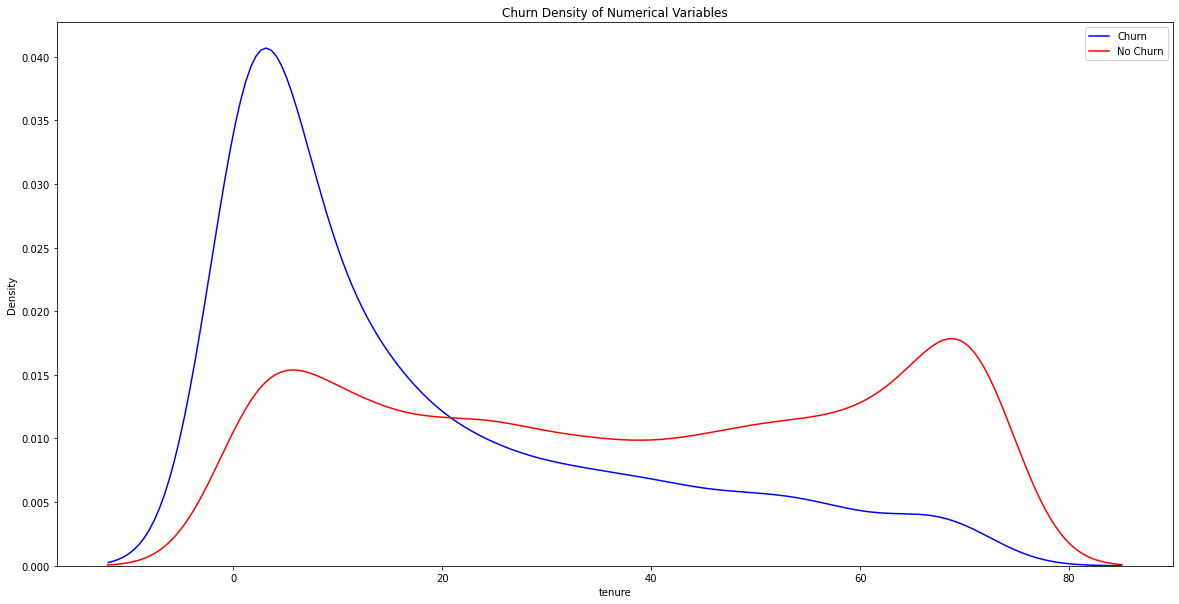

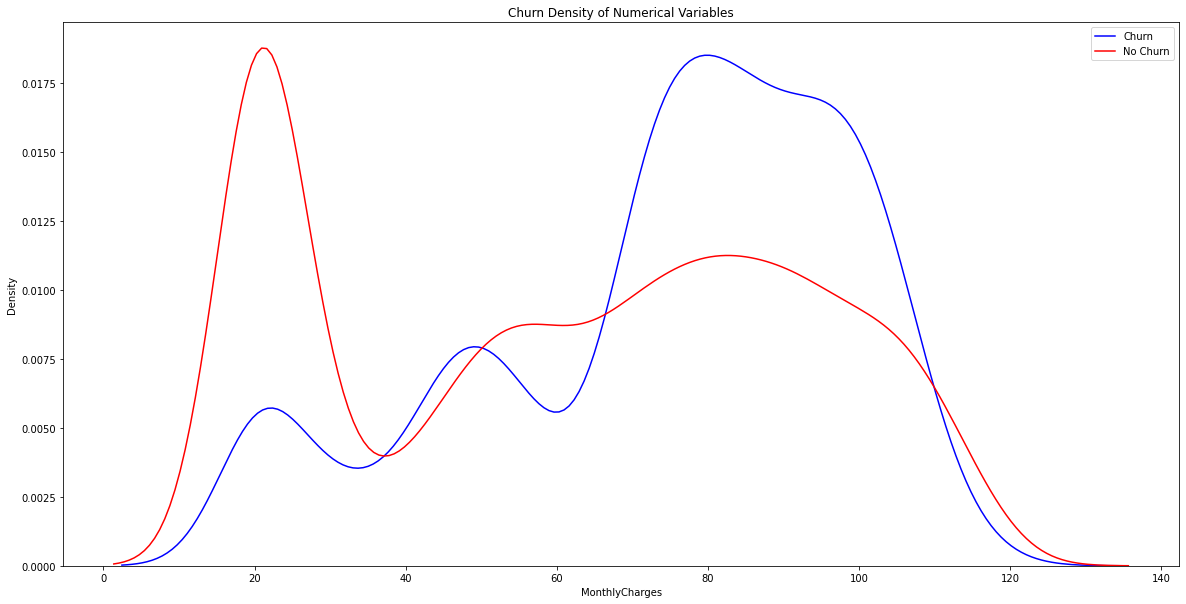

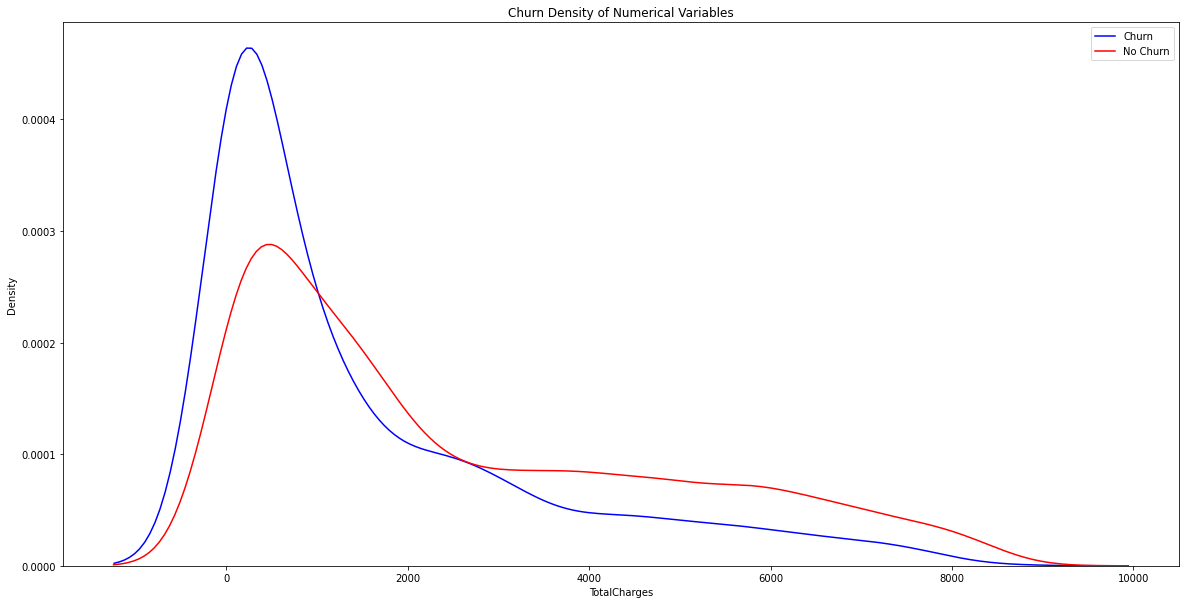

In [44]:
for col in num_cols:
    target_density_with_num(df,"Churn",col)

## 6. One-Hot Encoding

In [45]:
# one-hot encoding function:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [46]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
ohe_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'Categorical_tenure',
 'Categorical_MonthlyCharges',
 'Categorical_TotalCharges']

In [47]:
df = one_hot_encoder(df, ohe_cols)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW1_customerID,NEW2_customerID,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Categorical_tenure_tenure_Q2,Categorical_tenure_tenure_Q3,Categorical_tenure_tenure_Q4,Categorical_MonthlyCharges_MonthlyCharges_Q2,Categorical_MonthlyCharges_MonthlyCharges_Q3,Categorical_MonthlyCharges_MonthlyCharges_Q4,Categorical_TotalCharges_TotalCharges_Q2,Categorical_TotalCharges_TotalCharges_Q3,Categorical_TotalCharges_TotalCharges_Q4
0,7590-VHVEG,Female,0,Yes,No,1,No,Yes,29.850,29.850,0,7590,VHVEG,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,56.950,1889.500,0,5575,GNVDE,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,Yes,53.850,108.150,1,3668,QPYBK,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No,42.300,1840.750,0,7795,CFOCW,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,Yes,70.700,151.650,1,9237,HQITU,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


### 6.1 Label Encoding

In [48]:
lbe=LabelEncoder()

In [49]:
df['gender']=lbe.fit_transform(df['gender'])
df['Partner']=lbe.fit_transform(df['Partner'])
df['Dependents']=lbe.fit_transform(df['Dependents'])
df['PhoneService']=lbe.fit_transform(df['Partner'])
df['PaperlessBilling']=lbe.fit_transform(df['PaperlessBilling'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW1_customerID,NEW2_customerID,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Categorical_tenure_tenure_Q2,Categorical_tenure_tenure_Q3,Categorical_tenure_tenure_Q4,Categorical_MonthlyCharges_MonthlyCharges_Q2,Categorical_MonthlyCharges_MonthlyCharges_Q3,Categorical_MonthlyCharges_MonthlyCharges_Q4,Categorical_TotalCharges_TotalCharges_Q2,Categorical_TotalCharges_TotalCharges_Q3,Categorical_TotalCharges_TotalCharges_Q4
0,7590-VHVEG,0,0,1,0,1,1,1,29.850,29.850,0,7590,VHVEG,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,0,0,56.950,1889.500,0,5575,GNVDE,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
2,3668-QPYBK,1,0,0,0,2,0,1,53.850,108.150,1,3668,QPYBK,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,42.300,1840.750,0,7795,CFOCW,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
4,9237-HQITU,0,0,0,0,2,0,1,70.700,151.650,1,9237,HQITU,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


## 7. Standardizing for Numeric Variables

In [50]:
scaler=StandardScaler()

In [51]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7032
Variables: 43
cat_cols: 37
num_cols: 3
cat_but_car: 3
num_but_cat: 37


In [52]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [53]:
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW1_customerID,NEW2_customerID,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Categorical_tenure_tenure_Q2,Categorical_tenure_tenure_Q3,Categorical_tenure_tenure_Q4,Categorical_MonthlyCharges_MonthlyCharges_Q2,Categorical_MonthlyCharges_MonthlyCharges_Q3,Categorical_MonthlyCharges_MonthlyCharges_Q4,Categorical_TotalCharges_TotalCharges_Q2,Categorical_TotalCharges_TotalCharges_Q3,Categorical_TotalCharges_TotalCharges_Q4
0,7590-VHVEG,0,0,1,0,-1.280,1,1,-1.162,-0.994,0,7590,VHVEG,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,0.064,0,0,-0.261,-0.174,0,5575,GNVDE,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
2,3668-QPYBK,1,0,0,0,-1.240,0,1,-0.364,-0.960,1,3668,QPYBK,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,7795-CFOCW,1,0,0,0,0.512,0,0,-0.748,-0.195,0,7795,CFOCW,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
4,9237-HQITU,0,0,0,0,-1.240,0,1,0.196,-0.940,1,9237,HQITU,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


## 8. Model Building

I need to prepare the dataframe before model fitting.

In [54]:
df=df.drop('customerID',axis=1).drop('NEW2_customerID',axis=1)

In [55]:
df['NEW1_customerID'] = pd.to_numeric(df['NEW1_customerID'],errors='coerce')

In [56]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW1_customerID,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Categorical_tenure_tenure_Q2,Categorical_tenure_tenure_Q3,Categorical_tenure_tenure_Q4,Categorical_MonthlyCharges_MonthlyCharges_Q2,Categorical_MonthlyCharges_MonthlyCharges_Q3,Categorical_MonthlyCharges_MonthlyCharges_Q4,Categorical_TotalCharges_TotalCharges_Q2,Categorical_TotalCharges_TotalCharges_Q3,Categorical_TotalCharges_TotalCharges_Q4
0,0,0,1,0,-1.280,1,1,-1.162,-0.994,0,7590,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0.064,0,0,-0.261,-0.174,0,5575,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
2,1,0,0,0,-1.240,0,1,-0.364,-0.960,1,3668,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0.512,0,0,-0.748,-0.195,0,7795,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
4,0,0,0,0,-1.240,0,1,0.196,-0.940,1,9237,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [57]:
df.info() # ok ready to build our model

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   gender                                        7032 non-null   int64  
 1   SeniorCitizen                                 7032 non-null   int64  
 2   Partner                                       7032 non-null   int64  
 3   Dependents                                    7032 non-null   int64  
 4   tenure                                        7032 non-null   float64
 5   PhoneService                                  7032 non-null   int64  
 6   PaperlessBilling                              7032 non-null   int64  
 7   MonthlyCharges                                7032 non-null   float64
 8   TotalCharges                                  7032 non-null   float64
 9   Churn                                         7032 non-null   i

In [58]:
primitive_success=[]
model_names=[]
y=df['Churn']
X=df.drop('Churn',axis=1)
# Creating a Training Set and a Test Set from the Original Data Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

def ML():
    models=[KNeighborsClassifier,SVC,MLPClassifier,DecisionTreeClassifier,
        RandomForestClassifier,GradientBoostingClassifier,XGBClassifier,LGBMClassifier]
    for algName in models:
        # Model Building / Training
        model=algName().fit(X_train,y_train)
        model_name=algName.__name__
        model_names.append(model_name)
        # Prediction
        y_pred=model.predict(X_test)
        # primitive-Success / Verification Score
        from sklearn.metrics import accuracy_score
        primitiveSuccess=accuracy_score(y_test,y_pred)
        primitive_success.append(primitiveSuccess)
        # for graph
        if algName not in [KNeighborsClassifier,SVC,MLPClassifier]:
            feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': X_train.columns})
            plt.figure(figsize=(10, 10))
            sns.set(font_scale=1)
            sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                                  ascending=False)[0:len(X)])
            plt.title('Features'+ ' - ' + algName.__name__ )
            plt.tight_layout()
            plt.show()
    
    classification_Data=pd.DataFrame( primitive_success,columns=
                                 ['accuracy_Score'],
                                     index=[model_names]).sort_values(by='accuracy_Score',ascending=False)
        
    return classification_Data.head(20)

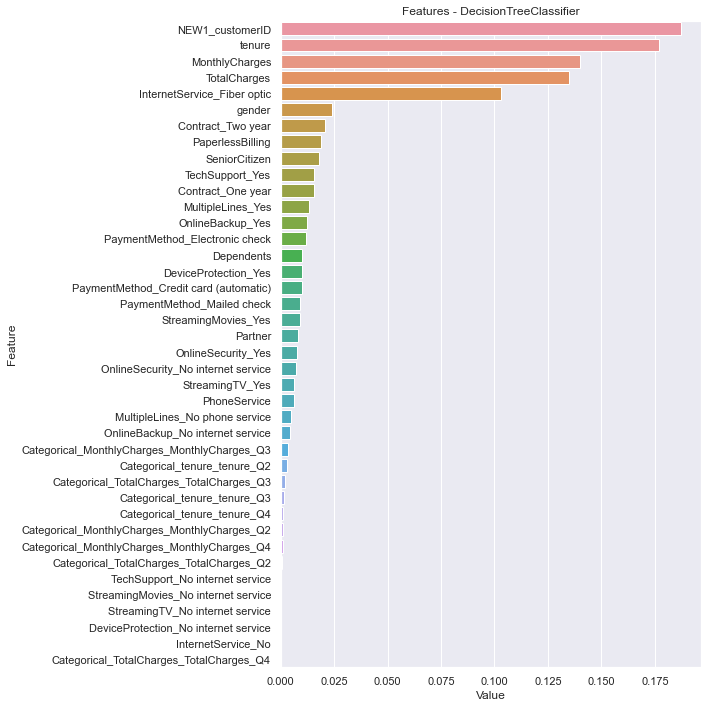

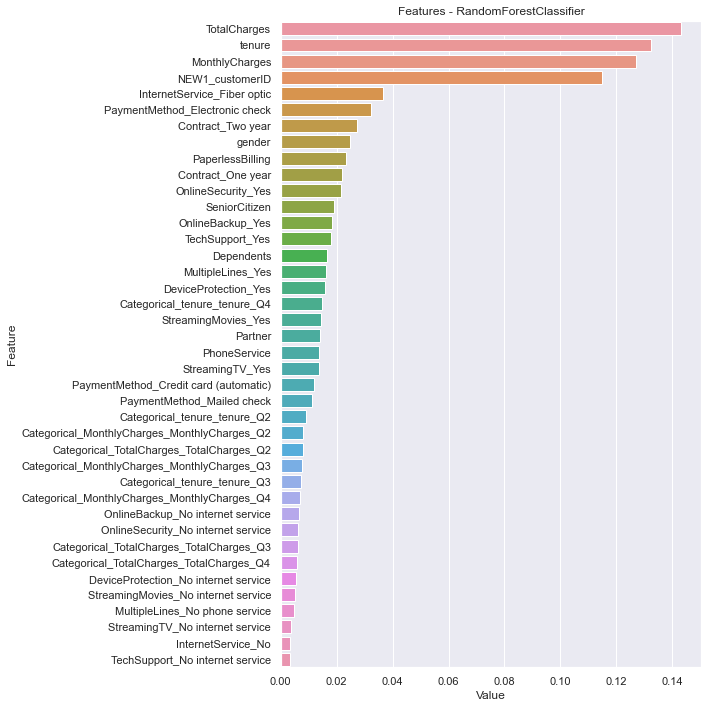

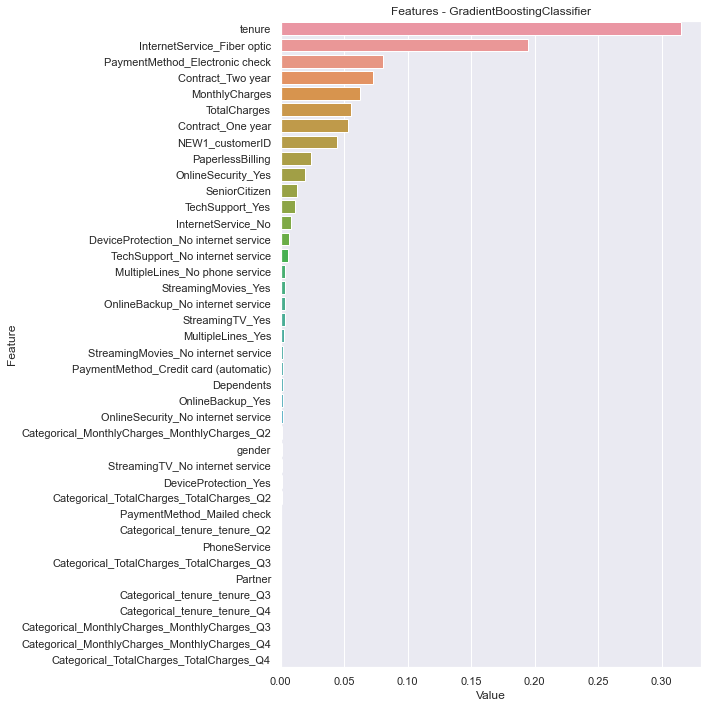

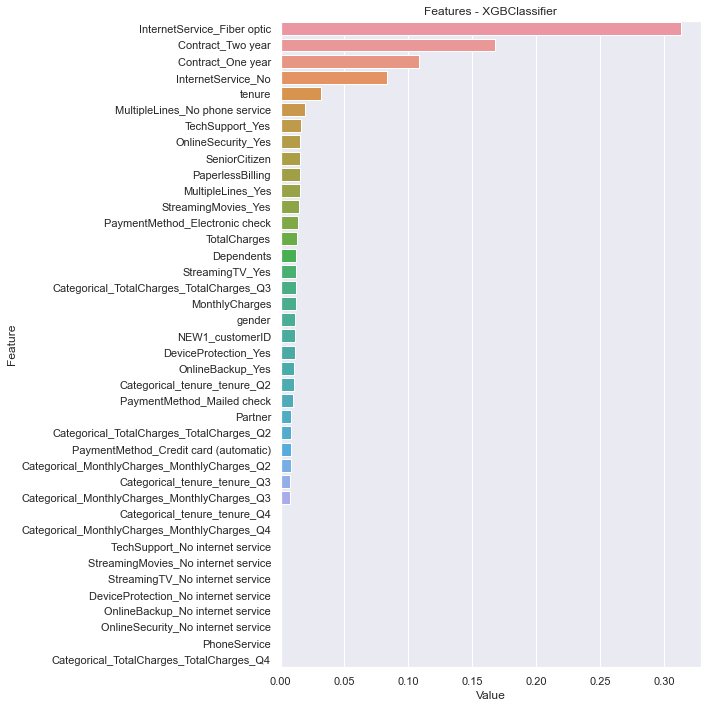

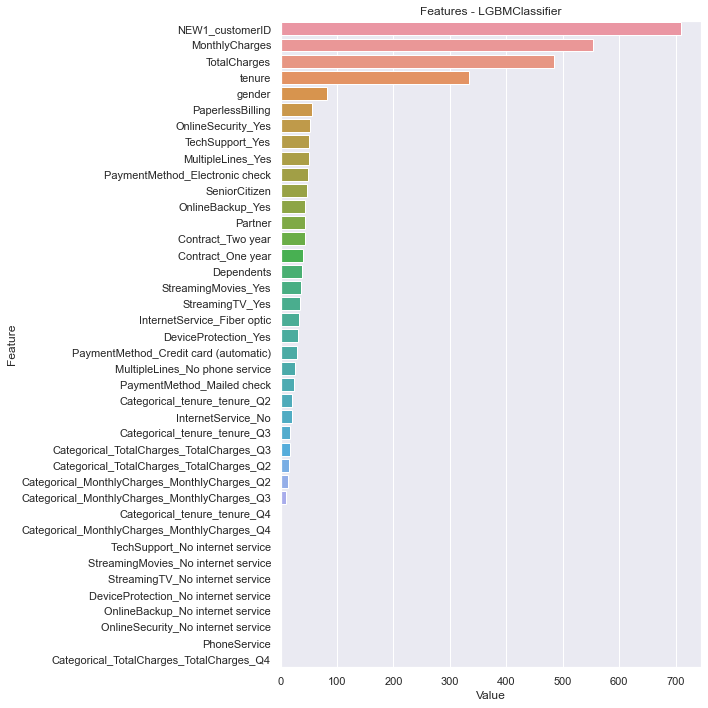

,accuracy_Score
GradientBoostingClassifier,0.804
LGBMClassifier,0.804
RandomForestClassifier,0.803
MLPClassifier,0.800
XGBClassifier,0.789
SVC,0.740
DecisionTreeClassifier,0.739
KNeighborsClassifier,0.683


In [59]:
ML()

Hope it will be useful :)

[Linkedin](https://www.linkedin.com/in/demir-zumrut/)